In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.stats import norm, kstest

In [9]:
plt.style.use('ggplot')

In [10]:
RESULT_DIR = "results/todftest_00"
with open(f'{RESULT_DIR}/conf.pkl', 'rb') as f:
    CONST = pickle.load(f)

if not os.path.exists(RESULT_DIR + '/immagini'):
    os.mkdir(f'{RESULT_DIR}/immagini')

In [13]:
df_list = [pd.read_pickle(f"{RESULT_DIR}/Model_vars_{i}.pkl") for i in range(CONST['N_RUNS'])]
df_list = [df.rolling(5, min_periods=1).mean() for df in df_list]

for i, model_df in enumerate(df_list):

    fig , ax = plt.subplots(2,1, figsize=(16, 10))
    ax[0].set_title(f'Price over time run={i}')
    ax[1].set_title(f'Technical fraction over time run={i}')
    ax[0].plot(model_df.price, label=f'Run {i}')

    ax[1].plot(model_df.technical_fraction, label=f'Run {i}')
    fig.savefig(f'{RESULT_DIR}/immagini/Price and technical fraction over time run={i}',facecolor='white', transparent=False)
    plt.close(fig)


1.0 0.0


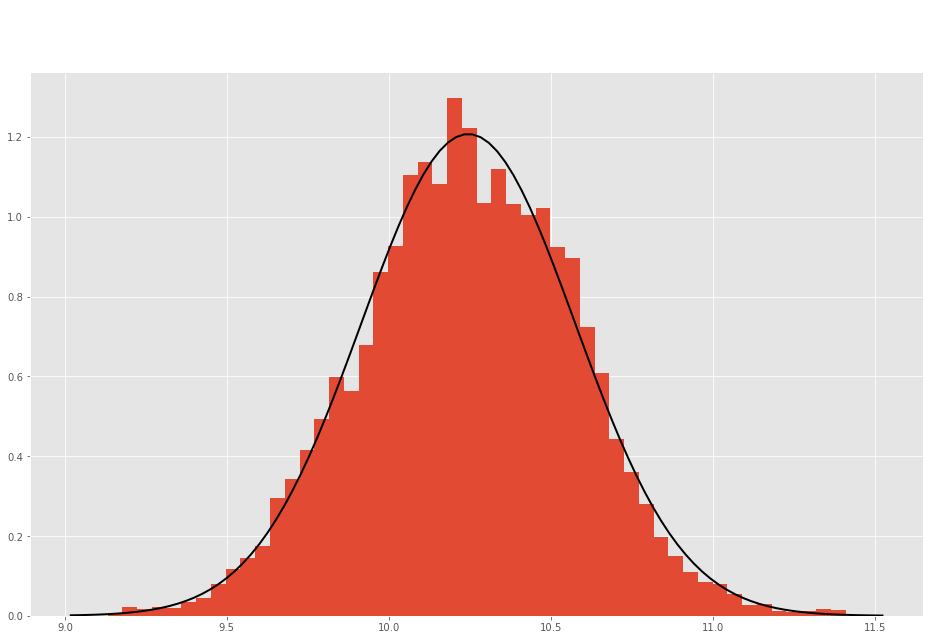

In [12]:
final_price_series = pd.Series(dtype=float)
for df in df_list:
    final_price_series = final_price_series.append(df.price.iloc[800:])

fig , ax = plt.subplots(1,1, figsize=(16, 10))
array = final_price_series.to_numpy()
mu, std = norm.fit(array)

ks_statistic, p_value = kstest(array, 'norm')
print(ks_statistic, p_value)

n, bins, patches = ax.hist(final_price_series, 50, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)

ax.set_title(f'Histogram of stationary price distributionn\n' + 
    f'Fit results: mu = {mu:.2f},  std = {std:.2f}\n' +
    f'KS test: p-value = {p_value:.4f}, ks = {ks_statistic:.4f}\n'
)

fig.savefig(f'{RESULT_DIR}/immagini/Histogram of stationary price distribution',facecolor='white', transparent=False)



0.2975524512928742 0.0


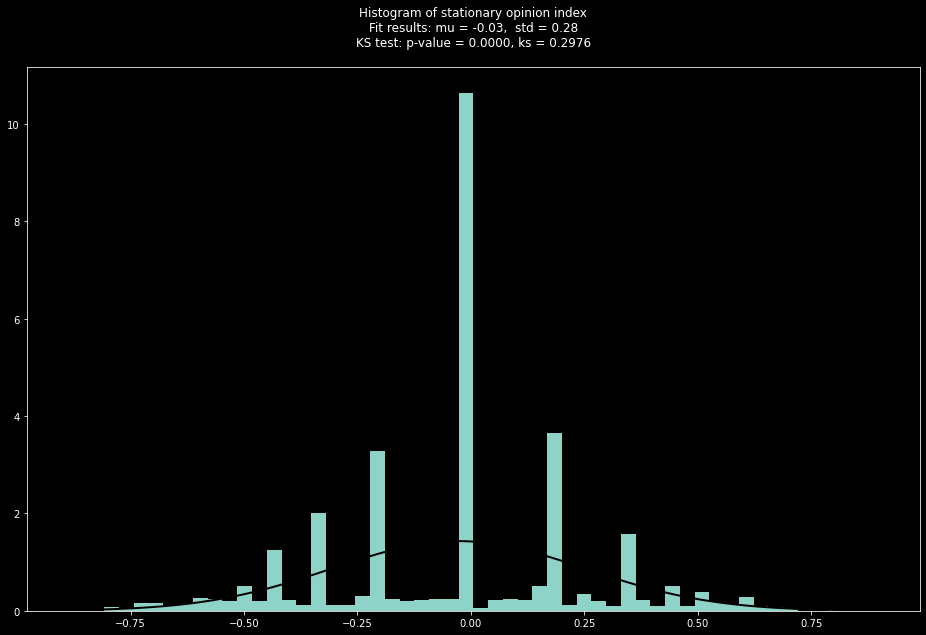

In [27]:
opinion_series = pd.Series(dtype=float)
for df in df_list:
    if 'opinion_index' in df.columns:
        opinion_series = opinion_series.append(df.opinion_index.iloc[800:])

    else:
        opinion_series = opinion_series.append((df.tech_optimists.iloc[800:] - df.tech_pessimists.iloc[800:])/(df.tech_optimists.iloc[800:] + df.tech_pessimists.iloc[800:]))

fig , ax = plt.subplots(1,1, figsize=(16, 10))
array = opinion_series.to_numpy()
mu, std = norm.fit(array)

ks_statistic, p_value = kstest(array, 'norm')
print(ks_statistic, p_value)

n, bins, patches = ax.hist(opinion_series, 50, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)

ax.set_title(f'Histogram of stationary opinion index\n' + 
    f'Fit results: mu = {mu:.2f},  std = {std:.2f}\n' +
    f'KS test: p-value = {p_value:.4f}, ks = {ks_statistic:.4f}\n'
)

fig.savefig(f'{RESULT_DIR}/immagini/Histogram of stationary opinion index distribution',facecolor='white', transparent=False)


0.5079783137169019 0.0


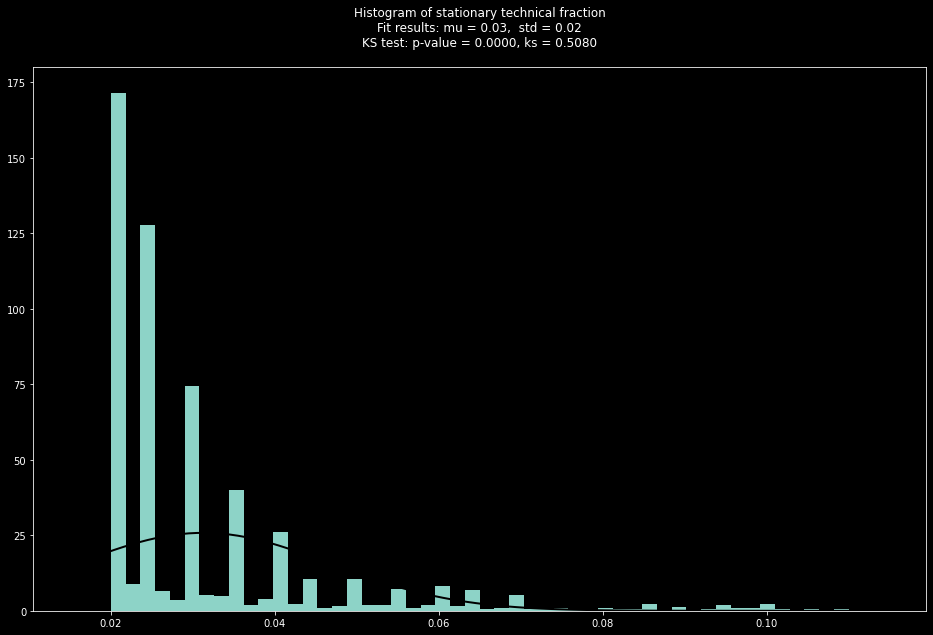

In [28]:
fraction_series = pd.Series(dtype=float)
for df in df_list:
    fraction_series = fraction_series.append(df.technical_fraction[800:])

fig , ax = plt.subplots(1,1, figsize=(16, 10))
array = fraction_series.to_numpy()
mu, std = norm.fit(array)

ks_statistic, p_value = kstest(array, 'norm')
print(ks_statistic, p_value)

n, bins, patches = ax.hist(fraction_series, 50, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)

ax.set_title(f'Histogram of stationary technical fraction\n' + 
    f'Fit results: mu = {mu:.2f},  std = {std:.2f}\n' +
    f'KS test: p-value = {p_value:.4f}, ks = {ks_statistic:.4f}\n'
)

fig.savefig(f'{RESULT_DIR}/immagini/Histogram of stationary technical fraction distribution',facecolor='white', transparent=False)

In [29]:

# for model_df in df_list:

#     edt = (model_df.tech_optimists - model_df.tech_pessimists) * CONST['tc']  # excess technical demand
#     edf = model_df.nf * CONST['gamma'] * (CONST['pf'] - model_df.price)

#     model_df["edt"] = edt
#     model_df["edf"] = edf
#     model_df["ed"]  = edt + edf

#     fig , ax = plt.subplots(2,1, figsize=(16, 10))
#     ax[0].plot(model_df.price)
#     ax[1].plot(model_df.edf, label="edf")
#     ax[1].plot(model_df.edt, label="edt")
#     ax[1].plot(model_df.ed, label="ed")
#     ax[1].legend()
# for model_df in df_list:
#     ept = (CONST['r'] + model_df.slope / CONST['v2']) / model_df.price - CONST['R']
#     epf = CONST['s'] * abs((model_df.price - CONST['pf']) / model_df.price)

#     U = CONST['a3'] * (ept - epf)
#     p_transition = CONST['v2'] * model_df.tech_optimists / CONST['N'] * np.exp(U) * CONST['DT']
#     fig, ax = plt.subplots(2, 1, figsize=(16,10))

#     ax[0].plot(p_transition)
#     ax[1].plot(ept, label="ept")
#     ax[1].plot(epf, label="epf")
#     ax[1].plot(U, label="U")
#     ax[1].legend()